In [108]:
import numpy as np
import pandas as pd

## Compute the population in each state

In [109]:
county = pd.read_csv('covid_county_population_usafacts.csv')

In [110]:
county.head(5)

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [111]:
population = county.groupby('State')['population'].sum()
population.head(5)

State
AK      731545
AL     4903185
AR     3017804
AZ     7278717
CA    39512223
Name: population, dtype: int64

## Extract the positive cases in each state from 2020-03-30 to 2020-12-27 (39 weeks)

In [112]:
from datetime import datetime
start_date = datetime(2020, 3, 30)
end_date = datetime(2020, 12, 27)
date_difference = end_date - start_date
num_weeks = (date_difference.days + 1) // 7
print("Number of weeks:", num_weeks)

Number of weeks: 39


In [113]:
confirmed = pd.read_csv('covid_confirmed_usafacts.csv')

In [114]:
confirmed.head(5)

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [115]:
date_range = pd.date_range(start="2020-03-30", end="2020-12-27").strftime('%Y-%m-%d').tolist()
cols = ['State'] + date_range
selected = confirmed[cols]
selected.drop_duplicates(inplace=True)
selected.head(5)

/var/folders/mg/fljxr9qs2hl4_gfz743f68gh0000gn/T/ipykernel_83493/1930672443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected.drop_duplicates(inplace=True)


,State,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
0,AL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AL,7,7,10,10,12,12,12,12,12,...,3647,3698,3741,3780,3841,3889,3942,3990,3999,4029
2,AL,18,19,23,25,28,29,34,38,42,...,11556,11722,11827,11952,12155,12321,12521,12666,12708,12825
3,AL,0,0,0,0,1,2,2,3,3,...,1318,1330,1336,1336,1363,1383,1390,1396,1398,1406
4,AL,2,3,3,4,4,4,7,7,8,...,1577,1601,1613,1628,1660,1683,1711,1725,1739,1746


In [116]:
any(selected.isnull().sum())

False

In [117]:
state_cases = selected.groupby('State').sum()
state_cases.head(5)

,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
State,,,,,,,,,,,,,,,,,,,,,
AK,119,133,142,147,157,171,185,191,213,226,...,42640,43117,43225,43423,43786,44231,44592,44792,44952,45211
AL,941,997,1106,1270,1534,1632,1840,2003,2197,2497,...,315683,319904,322451,324832,329811,334569,338801,342424,343456,345628
AR,503,560,621,678,732,740,853,924,991,1075,...,197421,200113,201650,203107,205048,207941,211145,213267,213969,214877
AZ,1154,1289,1414,1596,1769,2018,2269,2456,2575,2726,...,442671,448231,453597,453597,453597,453597,453597,453597,453597,453597
CA,16880,18250,19497,20994,22360,23865,24986,26124,27475,28892,...,1975411,2016961,2046614,2067329,2115605,2164469,2209614,2236250,2249217,2283755


## Fit SIR Model to Data

In [118]:
from scipy.integrate import odeint
from scipy import optimize

Text(0, 0.5, 'Observed I(t) / N')

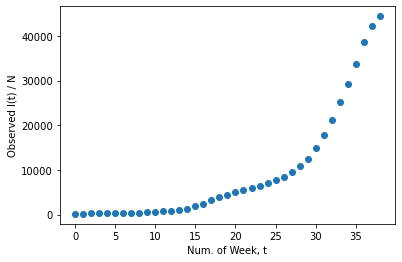

In [119]:
import matplotlib.pyplot as plt
state1 = state_cases.iloc[0, :]
y_total = state1.values
weekly_y_total = [sum(y_total[i:i+7]) / 7 for i in range(0, len(y_total), 7)]
x_total = range(0,39)

plt.figure()
plt.scatter(x_total, weekly_y_total)
plt.xlabel('Num. of Week, t')
plt.ylabel('Observed I(t) / N')

In [120]:
lam, p, gamma = 3, 0.05, 1./14
beta = lam * p

In [121]:
state_cases.index[state_cases.index.get_loc(state_cases.index[0])]

'AK'

[  0.34176414   0.18200021 152.945749  ]


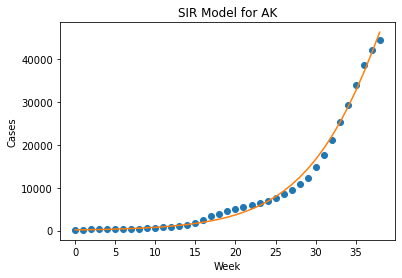

[2.65987812e-01 1.67544045e-01 1.42786174e+04]


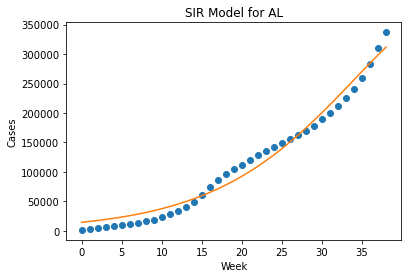

[2.37964511e-01 1.35271764e-01 6.44660095e+03]


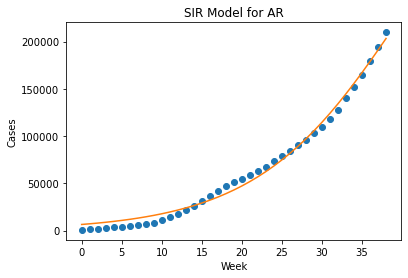

[2.40330715e-01 1.56171272e-01 3.02111673e+04]


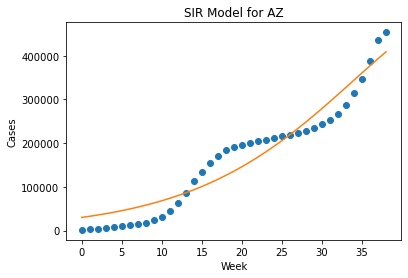

[1.40488520e-01 6.29110950e-02 1.14870428e+05]


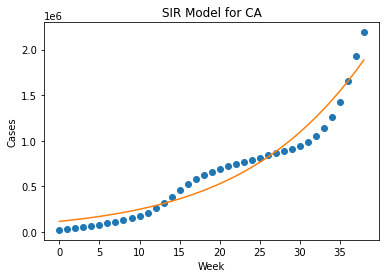

[2.96781699e-01 1.62890241e-01 2.67528719e+03]


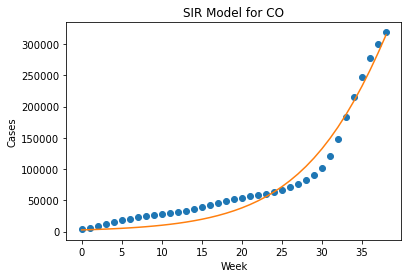

[6.25747657e-02 5.43678368e-03 1.67085089e+04]


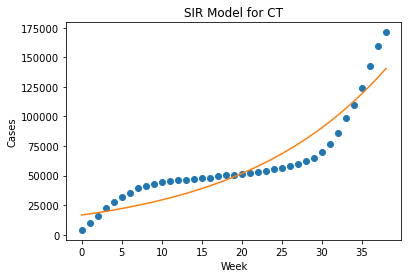

[1.59951264e-01 1.09446441e-01 4.85835908e+03]


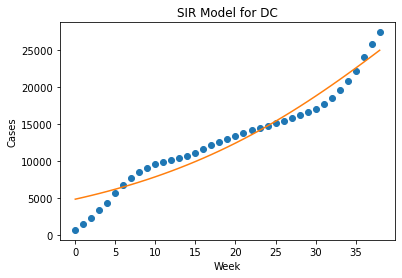

[ 2.11160491e-03 -6.09289443e-02  4.26397495e+03]


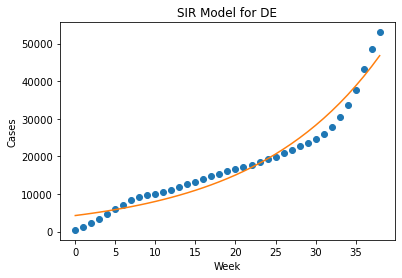

[3.65779850e-01 2.56943138e-01 6.26143161e+04]


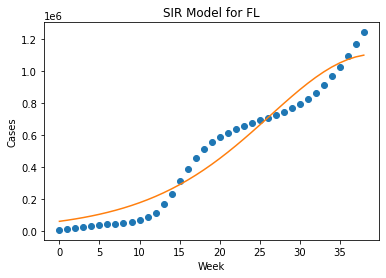

[-2.73006381e-01 -3.57889810e-01  4.02858761e+04]


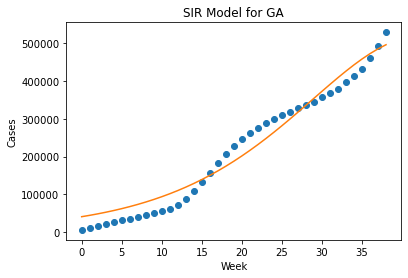

[  1.02865039   0.8678748  266.67798279]


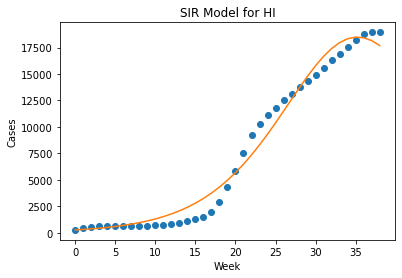

[1.77386918e-01 6.91373621e-02 6.13032365e+03]


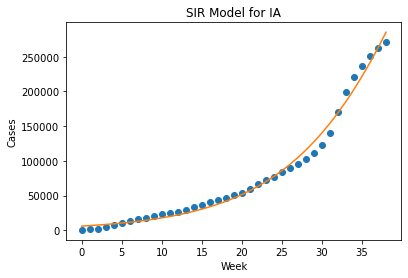

[2.82899152e-01 1.58356087e-01 1.95043347e+03]


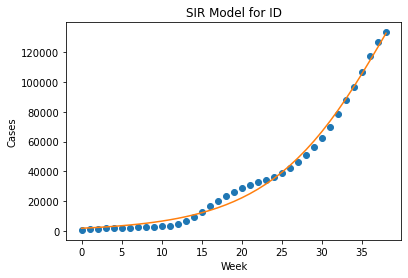

[ 3.86961369e-05 -8.52567888e-02  3.62316838e+04]


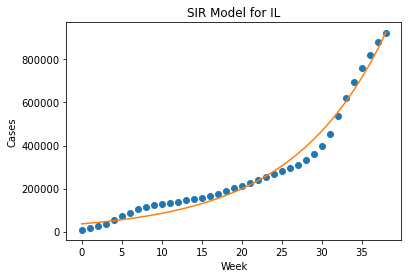

[2.29812783e-01 1.81849028e-01 7.73755364e+04]


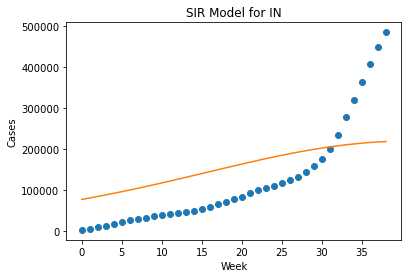

[3.06059970e-01 1.73450340e-01 2.20523421e+03]


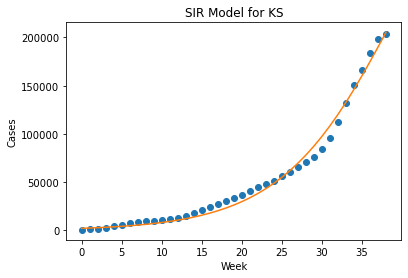

[3.13544284e-01 1.83653033e-01 2.64928208e+03]


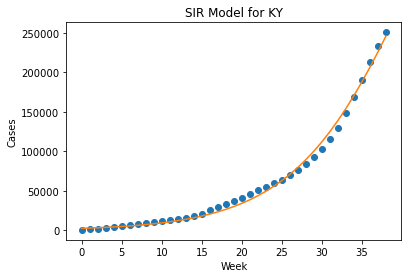

[2.49201114e-01 1.67659278e-01 2.63588585e+04]


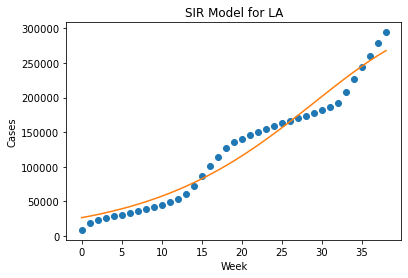

[ 4.57112325e-04 -4.52257255e-02  4.89860503e+04]


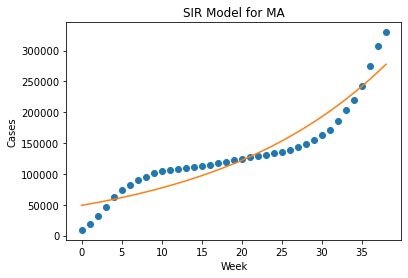

[ 5.68284184e-02 -3.75897704e-04  2.89921136e+04]


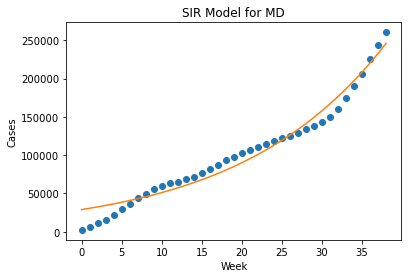

[ 1.16137011e-04 -8.82377316e-02  6.08150301e+02]


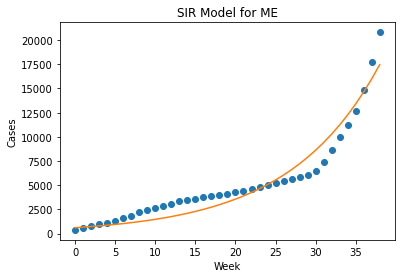

[6.67854854e-01 4.82055280e-01 1.19747046e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


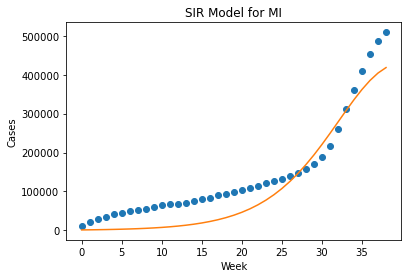

[2.52532109e-01 1.23016819e-01 4.17501994e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


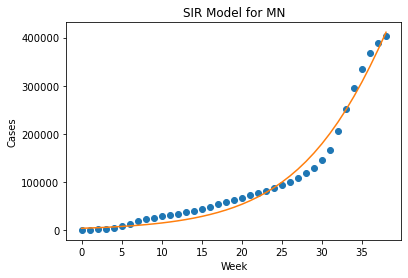

[2.77713897e-01 1.53356137e-01 6.16557536e+03]


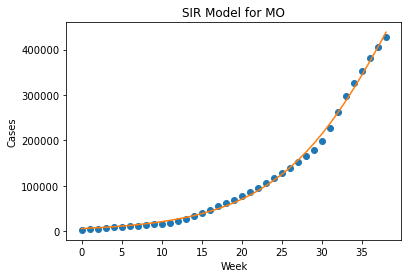

[2.71843103e-01 1.75748780e-01 1.01818329e+04]


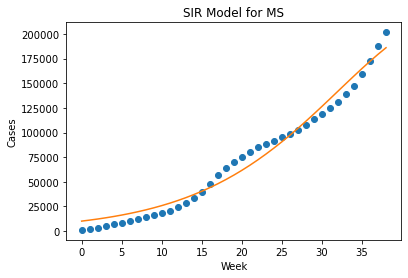

[2.66552741e-01 1.60313431e-01 1.88581140e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


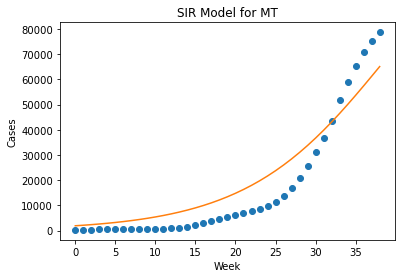

[2.60344769e-01 1.68543287e-01 2.18572816e+04]


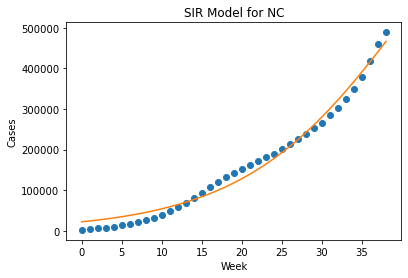

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[2.36015213e-01 8.98206979e-02 6.19414666e+02]


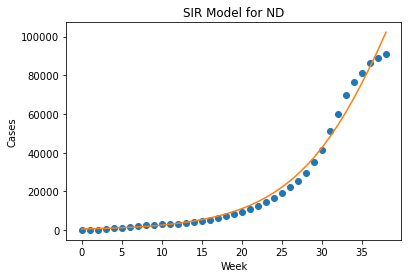

[2.41383435e-01 1.19829125e-01 2.44427235e+03]


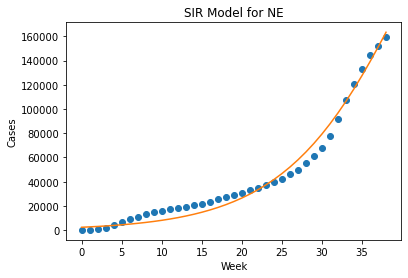

[ 6.59292426e-04 -9.75399166e-02  7.68704250e+02]


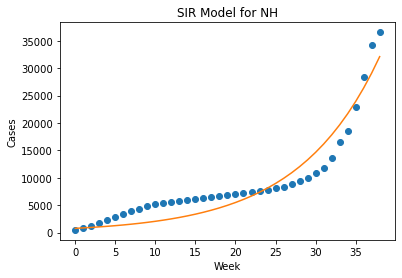

[ 2.98664332e-03 -3.50208519e-02  8.93255917e+04]


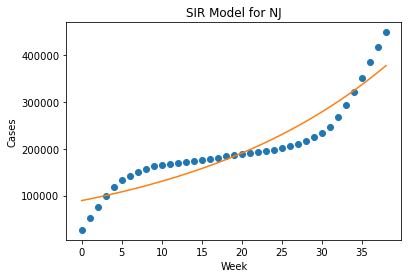

[2.83551507e-01 1.48295928e-01 1.07831506e+03]


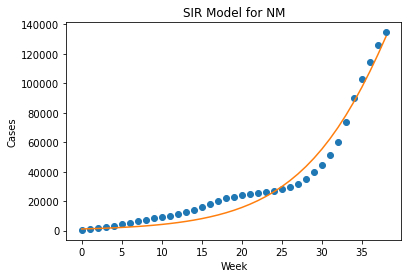

[1.69413303e-01 7.89608978e-02 8.09307774e+03]


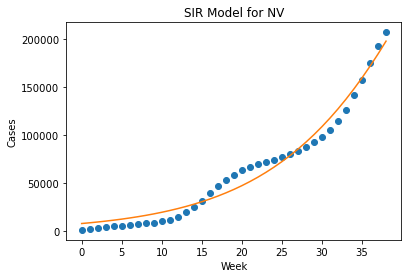

[-6.00237997e-04 -2.94521080e-02  2.41875264e+05]


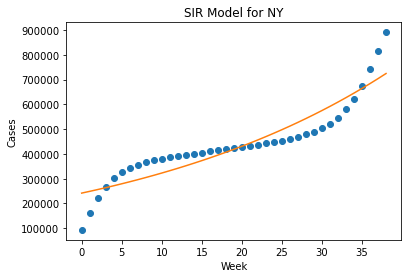

[ 5.45533265e-02 -5.86722319e-02  8.56280829e+03]


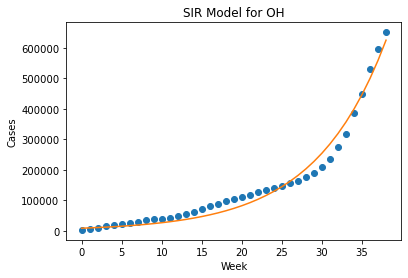

[2.45685236e-01 1.86723753e-01 3.95526978e+04]


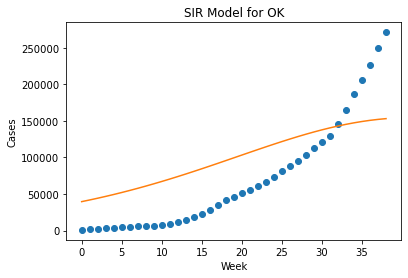

[2.79716793e-01 1.76668915e-01 2.44982822e+03]


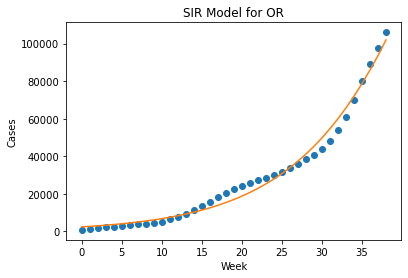

[1.11626001e-01 2.26447220e-02 1.84041467e+04]


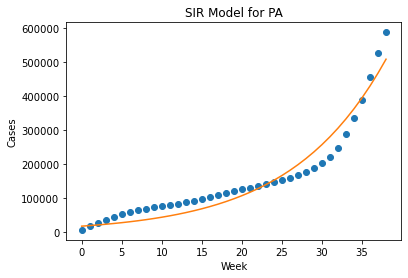

[-1.63311733e-03 -6.96168406e-02  4.82122899e+03]


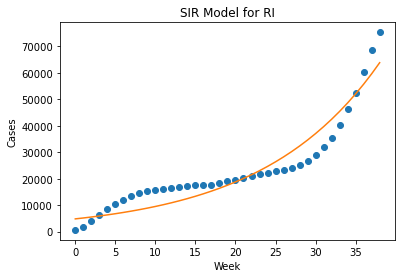

[3.50637085e-01 2.45128614e-01 1.26896988e+04]


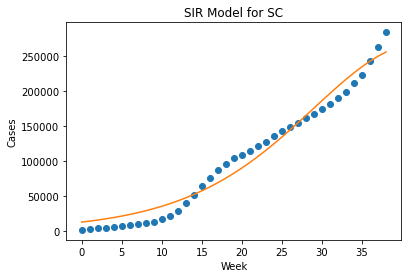

[2.15207174e-01 1.04745947e-01 2.25255492e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


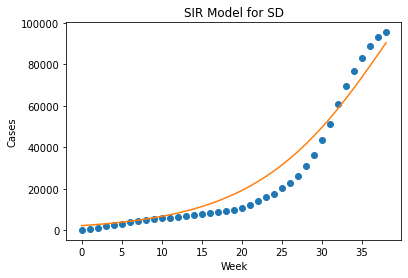

[1.08532826e-01 1.84952736e-02 1.86389231e+04]


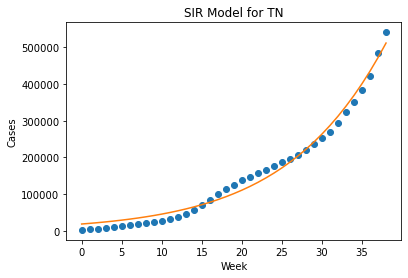

[3.01986401e-01 1.99401961e-01 6.24879709e+04]


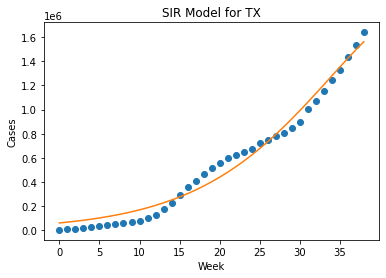

[2.84829193e-01 1.63626682e-01 4.27829976e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


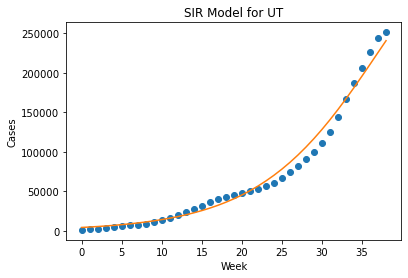

[1.90778438e-01 1.17601054e-01 2.36564048e+04]


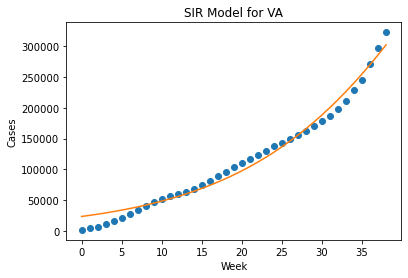

[ 9.14777355e-03 -6.99934959e-02  2.81559687e+02]


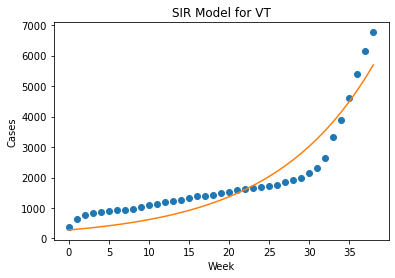

[ 4.63061974e-02 -2.78937697e-02  1.29914527e+04]


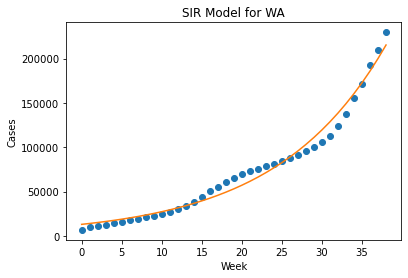

[2.79823602e-01 1.39902180e-01 4.28735134e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


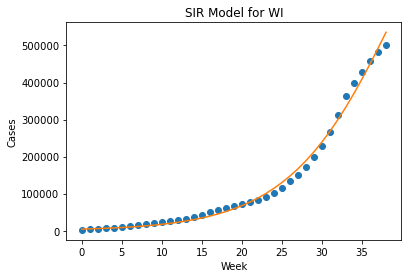

[2.11219227e-01 7.23876889e-02 4.23768418e+02]


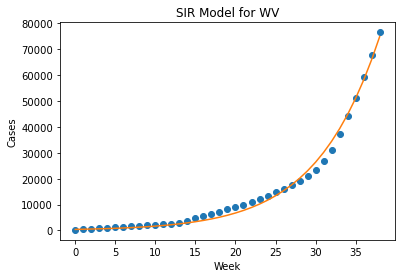

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[ 0.47028281  0.26726907 38.66843347]


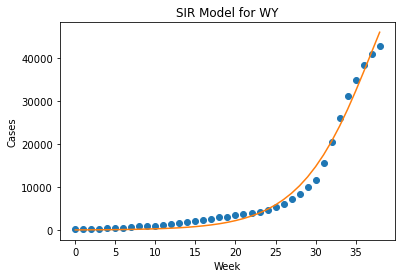

In [122]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def fit_odeint(x, beta, gamma, I0):
    S0 = N - I0
    R0 = 0
    return odeint(deriv, (S0, I0, R0), x, args=(N, beta, gamma))[:,1]

beta_values = {}
gamma_values = {}

for i in range(state_cases.shape[0]):
    state = state_cases.iloc[i, :]
    state_name = state_cases.index[state_cases.index.get_loc(state_cases.index[i])]
    N = population.values[i]
    y_total = state.values / N
    weekly_y_total = [sum(y_total[i:i+7]) / 7 for i in range(0, len(y_total), 7)]
    x_total = range(0,39)

    ydata = np.array(weekly_y_total, dtype=float) * N
    xdata = np.array(x_total, dtype=float)

    popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata,(0.3,1/14,0.05*N))
    print(popt)
    beta_values[state_name] = popt[0]
    gamma_values[state_name] = popt[1]

    fitted = fit_odeint(xdata, *popt)
    plt.plot(xdata, ydata, 'o')
    plt.plot(xdata, fitted)
    plt.title(f"SIR Model for {state_name}")
    plt.xlabel("Week")
    plt.ylabel("Cases")
    plt.show()

## fit the SIRV model

[ 3.09339155e-01  2.06436951e-01  3.69425357e+04 -5.91567468e-03
  3.62977359e+02]


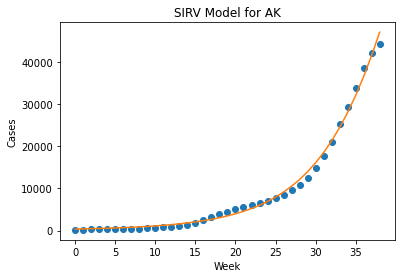

[ 3.28454508e-01 -8.84287827e-03  2.47576930e+07  2.56509395e-02
  4.30188175e+02]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


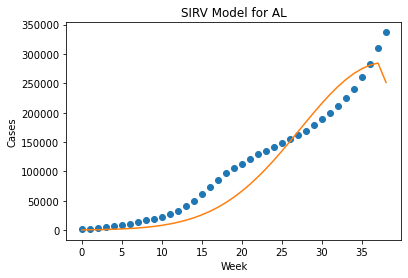

[3.39438089e-01 9.06022783e-02 1.16980483e+05 1.12351996e-02
 3.93852234e+02]


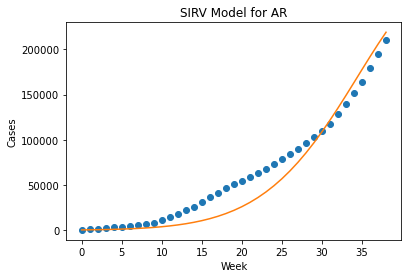

[2.53348709e-01 1.50691847e-02 1.28025744e+05 2.33954963e-02
 3.84581838e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


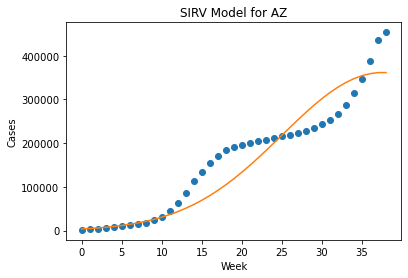

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 3.23899737e-01  4.03869595e-02 -5.26126113e+13  2.00613257e-02
  6.66826251e+03]


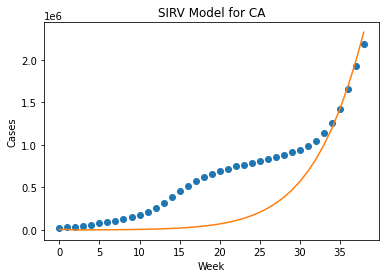

[3.80626843e-01 9.17883486e-02 4.08965757e+05 1.34143692e-02
 2.64119340e+02]


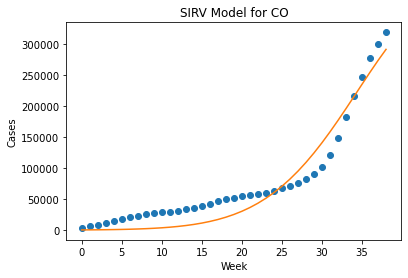

[3.01114105e-01 7.06800537e-02 1.77993306e+05 1.00396186e-02
 3.01315110e+02]


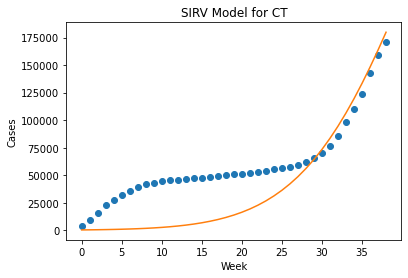

[ 2.74194193e-02 -3.11289531e-02  5.06927739e+06  2.62073385e-02
  4.53012501e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


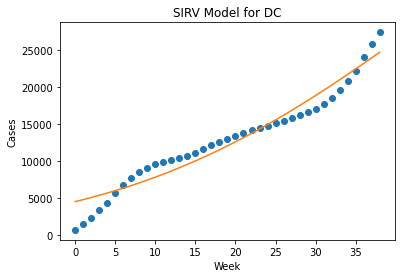

[ 3.43378234e-01  5.53693397e-01  5.83655279e+04 -4.80046137e-02
  2.12328977e+03]


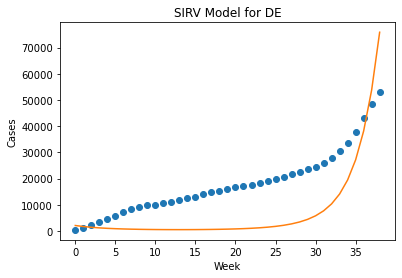

[3.51247109e-01 3.18134020e-02 1.25261161e+06 1.48891966e-02
 4.36425714e+02]


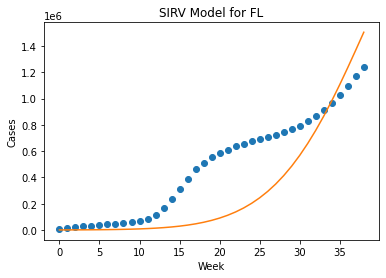

[3.22216489e-01 6.51738647e-02 6.17041557e+07 9.36230052e-03
 4.35520388e+02]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


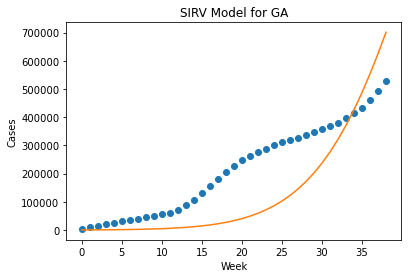

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[ 3.98971604e-01 -3.19656722e-02  6.83273970e+03  3.35090931e-02
  1.56596049e+01]


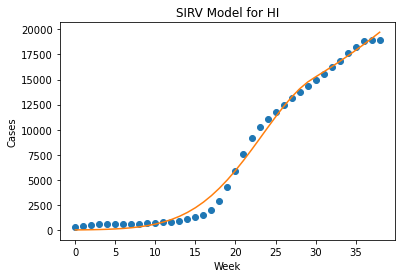

[3.37814721e-01 6.86495645e-02 1.55539965e+05 1.28002096e-02
 3.51206758e+02]


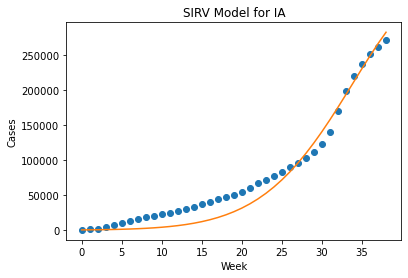

[ 2.93830341e-01  7.55238421e-02 -3.87455372e+06  1.16240385e-02
  4.87356606e+02]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


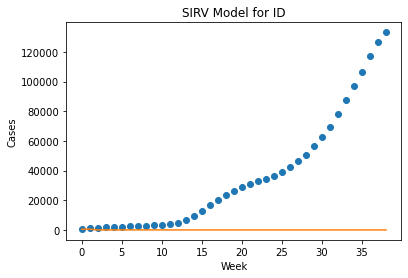

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[-3.90148038e-02 -9.46473666e-02  1.49570506e+05  2.94084507e-02
  5.09103189e+04]


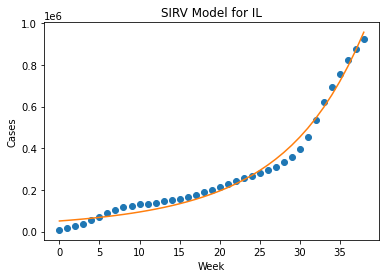

[3.20458437e-01 6.00150227e-02 3.19424117e+05 1.01575892e-02
 3.41421783e+02]


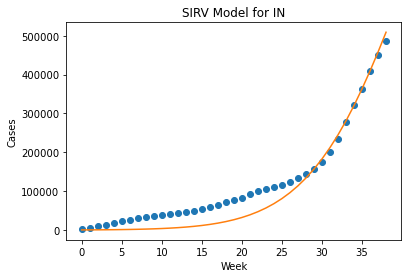

[2.44693344e-01 8.04910775e-02 1.13723633e+05 5.67868001e-03
 1.44706237e+03]


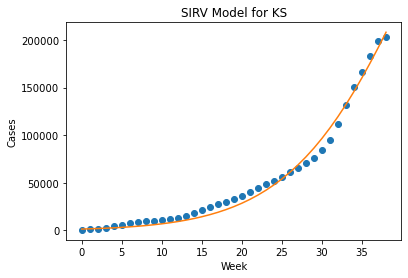

[2.43664947e-01 6.77145601e-02 2.35303159e+05 7.45561904e-03
 1.38449946e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


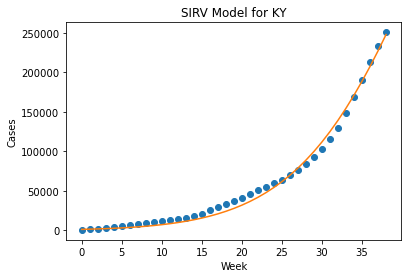

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.11274223e-01 6.80186377e-02 2.37967325e+05 8.45325578e-03
 3.15116617e+02]


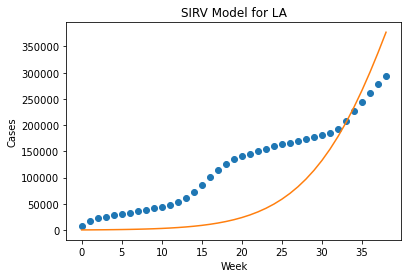

[ 3.40845033e-01 -3.17974647e-02  3.79005090e+05  4.86086104e-02
  2.35090988e+03]


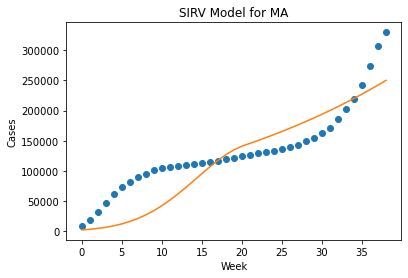

[3.07332131e-01 6.80592084e-02 1.42600705e+05 1.07914712e-02
 4.62939327e+02]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


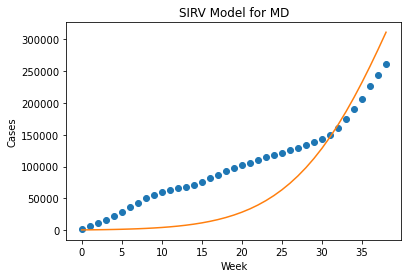

[ 2.62093752e-01  2.21924200e-01  1.44175879e+05 -8.16573429e-03
  9.75789042e+02]


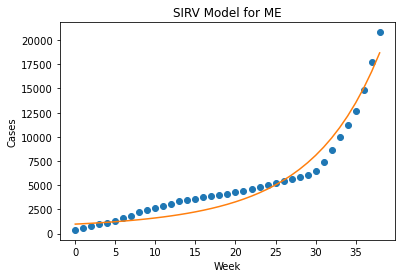

[3.13688023e-01 5.39316219e-02 6.71082139e+07 9.42751183e-03
 3.16676692e+02]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


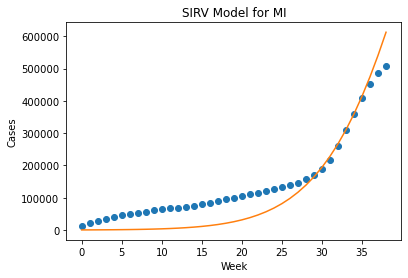

[3.14849812e-01 5.72802314e-02 2.83201437e+05 1.06444571e-02
 3.57658321e+02]


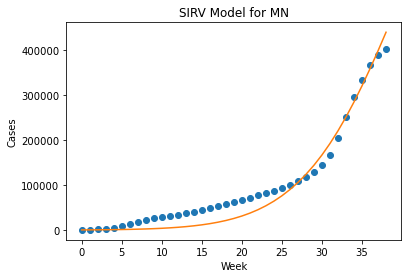

[3.16336196e-01 6.39774579e-02 3.80848105e+05 8.75123412e-03
 3.27299932e+02]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


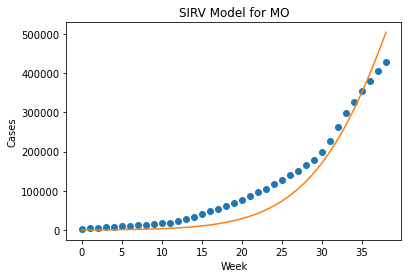

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[ 9.92356494e-02 -3.70136689e-02  1.49249425e+05  2.57358352e-02
  6.96783897e+03]


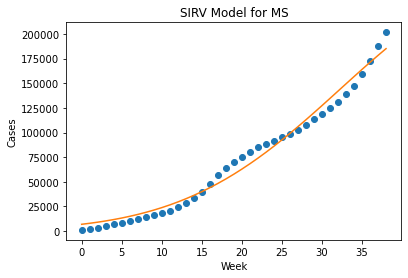

[3.22709435e-01 1.13310848e-01 2.06848715e+05 5.04971878e-03
 1.34545866e+02]


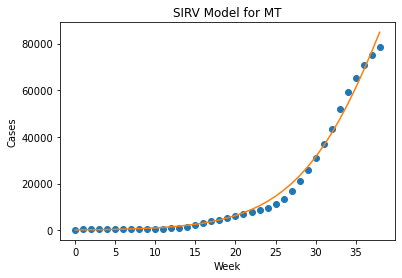

[3.08872497e-01 5.05200362e-02 2.01772165e+08 9.42628217e-03
 3.24796363e+02]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


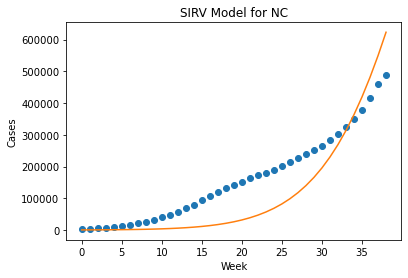

[3.94596483e-01 1.56642475e-01 6.18544778e+06 4.77474875e-03
 1.06825702e+02]


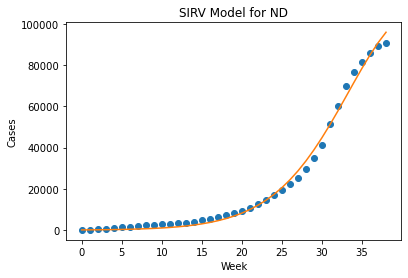

[3.06929048e-01 7.18622540e-02 9.74943111e+04 9.94074268e-03
 2.86135671e+02]


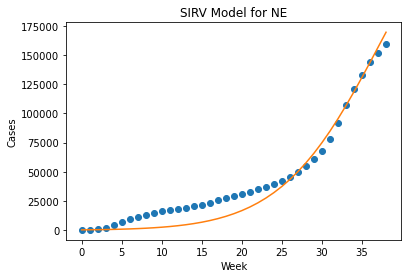

[ 2.67767640e-01  2.66997244e-01  2.73712310e+05 -1.51425227e-02
  2.30928332e+03]


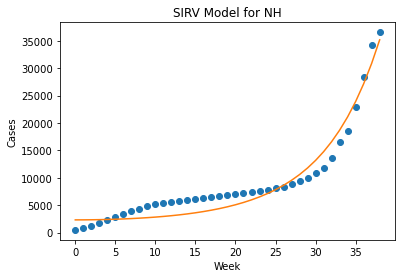

[3.59374472e-01 5.49762250e-02 5.03359323e+05 2.26370798e-02
 1.92058965e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


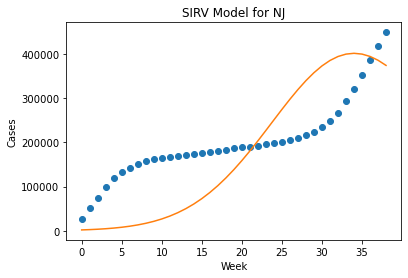

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[2.94127222e-01 7.32096814e-02 1.62014317e+05 9.84366438e-03
 2.96518894e+02]


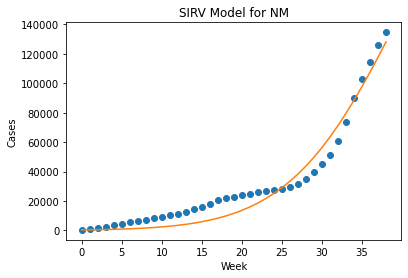

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.27239082e-01 7.59988736e-02 1.45710426e+05 1.33712244e-02
 4.69148708e+02]


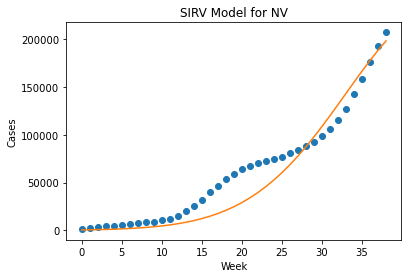

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.00515387e-01 7.09733521e-02 5.00257763e+05 9.96503098e-03
 3.01267970e+02]


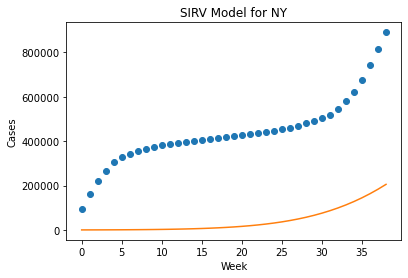

[3.26013124e-01 6.86284759e-02 6.38780826e+05 8.87085890e-03
 3.67457061e+02]


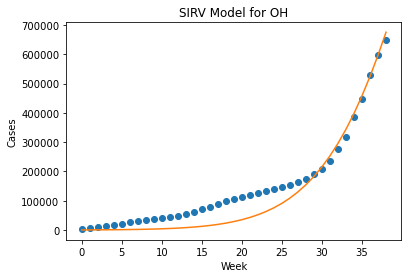

[3.25114141e-01 5.89974091e-02 1.96541979e+05 1.30004482e-02
 3.05719827e+02]


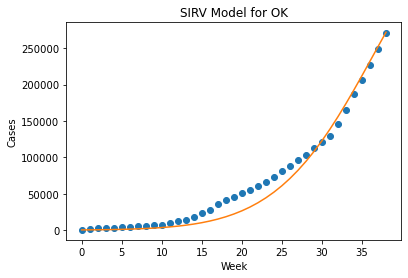

[ 1.13030590e-01  3.18819057e-02  1.43850746e+07 -4.63684114e-03
  3.41612289e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


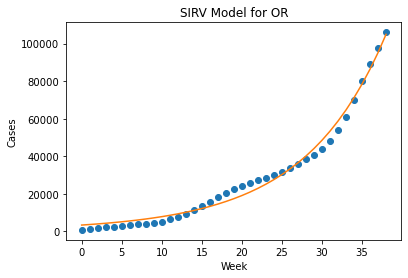

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.06773463e-01 4.65663151e-02 6.31873587e+05 9.94819821e-03
 3.21722703e+02]


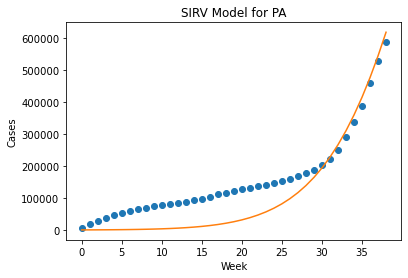

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[ 1.23428439e-01  6.30714430e-02  2.91027790e+06 -7.58393709e-03
  4.11219041e+03]


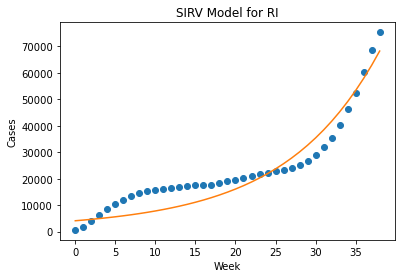

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[ 1.34779076e-01 -2.48154166e-02  2.29798513e+08  2.55076081e-02
  7.66276157e+03]


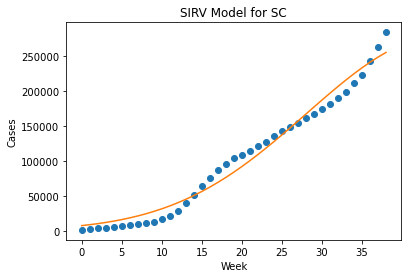

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[2.68403866e-01 7.57357733e-02 3.96273867e+04 6.04518053e-03
 3.33181769e+02]


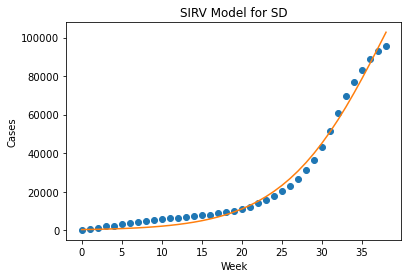

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.29850535e-01 6.80468472e-02 3.27537813e+05 8.78707907e-03
 3.08457491e+02]


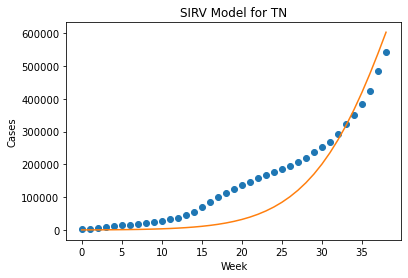

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[3.38331420e-01 6.44845191e-02 6.54465983e+05 9.50792641e-03
 3.25179888e+02]


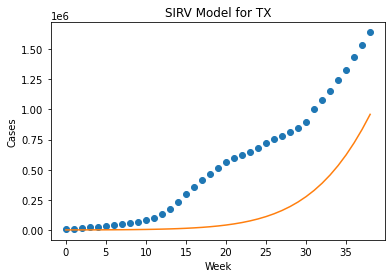

[3.12235604e-01 6.20600301e-02 1.59928799e+05 1.11487267e-02
 3.33804544e+02]


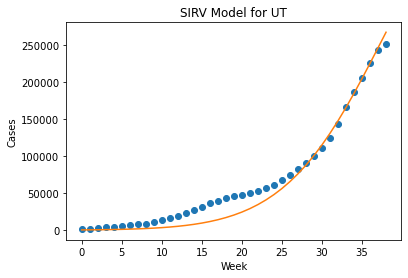

[3.27470514e-01 7.09126372e-02 4.16350262e+06 1.82948709e-02
 1.52489767e+03]


/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


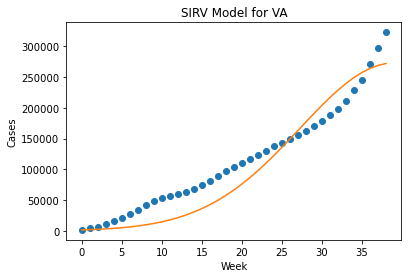

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[ 5.49365335e-01 -6.22951275e-02 -1.22733419e+07  2.56242675e-03
  2.19637975e+02]


/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


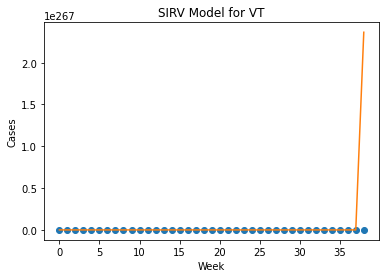

/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[-1.50380914e-02 -7.80301651e-02  1.57649900e+06  2.70653275e-02
  1.47430883e+04]


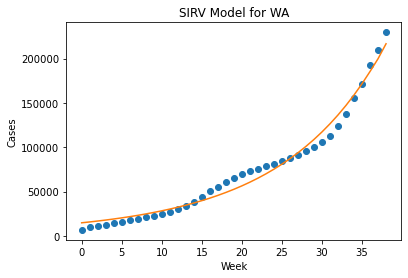

[3.30027021e-01 6.99903504e-02 3.21010372e+05 9.06043056e-03
 3.71748174e+02]


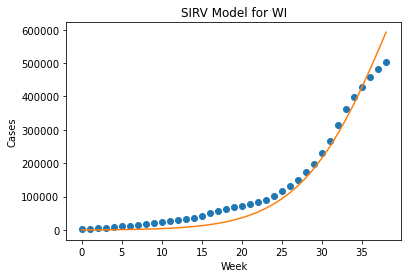

[ 1.87811823e-01  9.18869850e-02  1.47738018e+07 -7.52700934e-03
  7.94829826e+02]


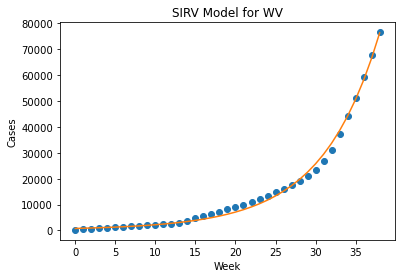

[ 3.73135774e-01  2.37295298e-01  1.78840871e+05 -4.07498773e-03
  1.48378433e+02]


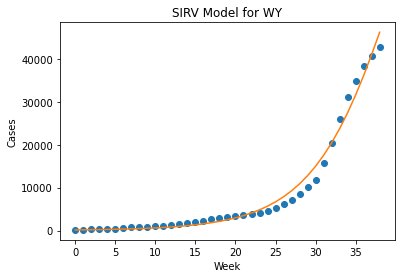

In [123]:
def deriv(y, t, N, beta, gamma, delta, v_rate):
    S, I, R, V = y
    dSdt = -beta * S * I / N - delta * S * V / N # vaccine reduces S
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    dVdt = v_rate * N - delta * S * V / N 
    return dSdt, dIdt, dRdt, dVdt

def fit_odeint(x, beta, gamma,delta, v_rate, I0):
    S0 = N - I0
    R0 = 0
    V0 = 0
    return odeint(deriv, (S0, I0, R0, V0), x, args=(N, beta, gamma, delta, v_rate))[:,1]

beta_values = {}
gamma_values = {}

for i in range(state_cases.shape[0]):
    state = state_cases.iloc[i, :]
    state_name = state_cases.index[state_cases.index.get_loc(state_cases.index[i])]
    N = population.values[i]
    y_total = state.values / N

    weekly_y_total = [sum(y_total[i:i+7]) / 7 for i in range(0, len(y_total), 7)]
    x_total = range(0,39)

    ydata = np.array(weekly_y_total, dtype=float) * N
    xdata = np.array(x_total, dtype=float)

    popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata,(0.3,1/14,0.05*N,0.01,300))
    print(popt)
    beta_values[state_name] = popt[0]
    gamma_values[state_name] = popt[1]

    fitted = fit_odeint(xdata, *popt)
    plt.plot(xdata, ydata, 'o')
    plt.plot(xdata, fitted)
    plt.title(f"SIRV Model for {state_name}")
    plt.xlabel("Week")
    plt.ylabel("Cases")
    plt.show()

In [124]:
import gurobipy as gp
from gurobipy import GRB

total_vaccine_supply = 100000000  # Initial vaccine supply (100 million)

model = gp.Model("VaccineAllocation_SIRV")

# Fetching the data for states
states = list(beta_values.keys())

# Initialize empty arrays/lists to store data for all states
N = []  # Population for each state
I0 = []  # Initial infected people for each state
S0 = []  # Initial susceptible people for each state
v_rate = 0.01  # Specify the vaccination rate (adjust as needed)
delta = 0.05  # Specify the vaccine effectiveness (adjust as needed)
V0 = 0  # Initial vaccinated population (adjust as needed)

for i in range(state_cases.shape[0]):
    state_population = population.values[i]
    N.append(state_population)
    I0.append(state_cases.iloc[i,0])
    S0.append(state_population - I0[-1])  # Calculate S0 for the current state

# Convert lists to NumPy arrays
N = np.array(N)
I0 = np.array(I0)
S0 = np.array(S0)

# gamma and beta are already correctly fetched as arrays
gamma = np.array(list(gamma_values.values()))
beta = np.array(list(beta_values.values()))

# Decision variables
V = {}
for j in range(len(states)):
    V[j] = model.addVar(lb=0, ub=N[j], vtype=GRB.CONTINUOUS, name=f"V_{states[j]}")


# Set objective function to minimize the maximum number of infected people
Z = model.addVar(vtype=GRB.CONTINUOUS, name="Z")
model.setObjective(Z, GRB.MINIMIZE)

# Add constraints

# Total Vaccine Supply Constraint:
model.addConstr(gp.quicksum(V[j] for j in range(len(states))) == total_vaccine_supply, "TotalVaccineSupply")

# Maximum Infected Constraint for Each State:
for j in range(len(states)):
    model.addConstr(Z >= I0[j] + beta[j] * I0[j] * (S0[j] - V[j]) / N[j] - gamma[j] * I0[j], f"MaxInfected_{states[j]}")

# Non-Negative Vaccine Allocation Constraint:
for j in range(len(states)):
    model.addConstr(V[j] >= 0, f"MinVaccinated_{states[j]}")

# Minimum Allocation Constraint for Each State:
min_allocation = 10000  # Minimum allocation for each state (adjust as needed)
for j in range(len(states)):
    model.addConstr(V[j] >= min_allocation, f"MinAllocation_{states[j]}")


# Optimize the model
model.optimize()

# Check if the optimization was successful
if model.status == GRB.OPTIMAL:
    # Retrieve the optimal allocation
    optimal_allocation = [V[j].x for j in range(len(states))]
    
    # Print the optimal allocation for each state
    for j in range(len(states)):
        print(f"Optimal allocation for {states[j]}: {optimal_allocation[j]}")
    
    # Print the objective value (minimum maximum infected)
    print(f"Minimum maximum infected (Objective Value): {model.objVal}")

else:
    print("Optimization did not converge or encountered an error.")

# Dispose of the model to free up resources
model.dispose()


Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[rosetta2])

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 154 rows, 52 columns and 255 nonzeros
Model fingerprint: 0x2882dd75
Coefficient statistics:
  Matrix range     [1e-05, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [6e+05, 4e+07]
  RHS range        [1e+02, 1e+08]
Presolve removed 154 rows and 52 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.2355269e+04   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  6.235526909e+04
Optimal allocation for AK: 10000.0
Optimal allocation for AL: 10000.0
Optimal allocation for AR: 1852332.0
Optimal allocation for AZ: 10000.0
Optimal allocation for CA: 10000.0
Optimal allocation for CO: 10000.0
Optimal allocation for CT: 10000.0
Optimal allocat